In [380]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os as os
import zipfile as zp
import csv as csv
import urllib as ulr
import io
import geopandas as gp
import pandas as pd
import json
from __future__  import print_function, division
import pylab as pl
import numpy as np
import os as os
import zipfile as zp
import csv as csv
import urllib as ulr
from scipy import stats
import statsmodels.formula.api as smf

from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix

from datetime import datetime
%pylab inline






Populating the interactive namespace from numpy and matplotlib


In [359]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


In [360]:
getCitiBikeCSV('201402')
data = pd.read_csv('/home/cusp/nm2762/PUIdata/201402-citibike-tripdata.csv')


file in place, you can continue


# We have the data of the city bike trip of February 2014

## HYPOTHESIS:
## The average number of bike-trips of a working day in February is higher than the average numbers of bike trips in the weekend

### Lets define
### WORKING DAY = MONDAY-FRIDAY
### WEEK-END = SATURDAY AND SUNDAY
### BIKE TRIP = A pick up of a bike
### AVERAGE NUMBER OF BIKE-TRIPS = Total number of bike-trips of "n" days divided by "n"

## NULL HYPOTHESIS
### The average number of bike-trips of a working day in February is equal or less than the average numbers of bike trips in the weekend


### Significance level a=0.05

## Mathematical Representation of the HY
### Mean_workingday_trip>Mean_weekendday_trip

In [361]:
data['date'] = pd.to_datetime(data['starttime'])


In [362]:
data.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)



 We know that the 01 February 2014 was Saturday

In [363]:
data ['weekday'] = data ['date'].apply(lambda x: x.weekday())

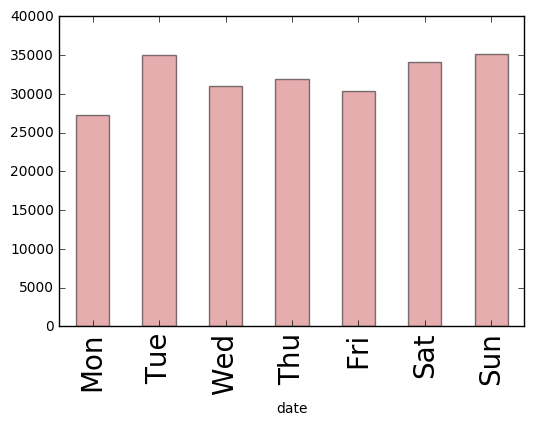

In [364]:
ax = ((data['date'].groupby([data['date'].dt.weekday]).count())).plot(kind="bar", color='IndianRed', alpha=0.5)
tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)


In [365]:
weekendday = []
weekendday = data[(data['weekday'] == 5) | (data['weekday'] == 6)  ]

weekday = []
weekday = data[(data['weekday'] == 0) | (data['weekday'] == 2) |
                  (data['weekday'] == 3) | (data['weekday'] == 4)
                  | (data['weekday'] == 1)  ]


In [366]:
datelist = pd.date_range(start= '2014-02-01', end= '2014-02-28').tolist()
countweekday = []
for k in datelist: 
    countweekday.append(len( weekday[(weekday['date']> k) & (weekday['date'] < k+1)  ]))

In [367]:
countweekendday = []
for k in datelist: 
    countweekendday.append(len( weekendday[(weekendday['date']> k) & (weekendday['date'] < k+1)]))

In [368]:
while 0 in countweekday:
    countweekday.remove(0)
while 0 in countweekendday:
    countweekendday.remove(0)

In [369]:
countweekdayframe = pd.DataFrame(countweekday, columns=["occurance"])
countweekenddayframe = pd.DataFrame(countweekendday,columns=["occurance"] )

mean_weekday = countweekdayframe.mean()['occurance']
std_weekday = countweekdayframe.std()['occurance']
mean_weekendday = countweekenddayframe.mean()['occurance']
std_weekendday = countweekenddayframe.std()['occurance']


In [370]:
countallday = []
for k in datelist: 
    countallday.append(len( data[(data['date']> k) & (data['date'] < k+1)  ]))
countalldayframe = pd.DataFrame(countallday, columns=['occurance'])

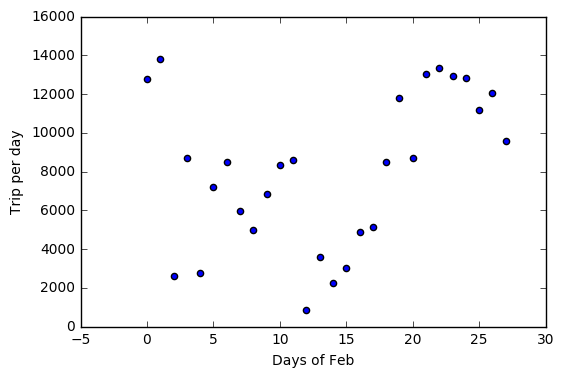

In [371]:
pl.scatter(range(0,len(countalldayframe)), countalldayframe['occurance'], )
pl.xlabel('Days of Feb')
pl.ylabel('Trip per day')

In [376]:
mean_weekday 

7776.6999999999998

In [377]:
std_weekday 

3544.297081227814

In [378]:
mean_weekendday 

8650.0

In [379]:
std_weekendday 

5042.2785382347593

# Working Day average of trips is 7776.69
# Weekend Day average of trips is 8650.0

# Working Day std of trips is 3544.297081227814
# Weekend Day std of trips is 5042.2785382347593

# The HY is rejected

# We ran the T-test

In [384]:
res = stats.ttest_ind(countweekdayframe, countweekenddayframe, axis=0, equal_var=True)

In [390]:
res

Ttest_indResult(statistic=array([-0.52148881]), pvalue=array([ 0.60644043]))